In [2]:
import pandas as pd

In [12]:
df_train = pd.read_csv('data/train.csv', index_col='Id')
df_test = pd.read_csv('data/test.csv', index_col='Id')

In [13]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df_train.shape

(1460, 80)

In [15]:
miss_train_data = df_train.isnull().sum()

In [16]:
miss_train_data

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [26]:
# Read the data
X_full = df_train
X_test_full = df_test

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [28]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
def score_model(model, X_t, X_v, y_t, y_v):
    model.fit(X_t, y_t)
    predictions = model.predict(X_v)
    score = mean_absolute_error(y_v, predictions)
    return score

In [34]:
for i in range(0, len(models)):
    mae = score_model(models[i], X_train, X_valid, y_train, y_valid)
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


In [35]:
best_model = model_3

In [36]:
my_model = best_model

In [37]:
my_model.fit(X, y)

RandomForestRegressor(criterion='absolute_error', random_state=0)

In [38]:
# Generate test predictions
preds_test = my_model.predict(X_test)

# Missing Values

In [78]:
melb_data = pd.read_csv('data/melb_data.csv')

In [79]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [80]:
X = melb_data.copy()
y = X.Price

In [81]:
melb_predictors = X.drop(['Price'], axis=1)

In [82]:
col_types = melb_predictors.dtypes

In [83]:
col_types

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [84]:
X = melb_predictors.select_dtypes(exclude=['object'])

In [86]:
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [88]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train,y_train)
    preds = model.predict(X_valid)
    score = mean_absolute_error(y_valid,preds)
    return score

In [92]:
colls_with_missing_vals = [col for col in X_train.columns
                          if X_train[col].isnull().sum().any() ]

In [93]:
colls_with_missing_vals

['Car', 'BuildingArea', 'YearBuilt']

In [94]:
reduced_X_train = X_train.drop(colls_with_missing_vals, axis = 1)
reduced_X_valid = X_valid.drop(colls_with_missing_vals, axis = 1)

In [95]:
score_dataset(reduced_X_train,reduced_X_valid,y_train, y_valid)

183550.22137772635

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
Imputer = SimpleImputer()

In [98]:
X_train_imputed = Imputer.fit_transform(X_train)
X_valid_imputed = Imputer.transform(X_valid)

In [101]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns = X_train.columns)

In [102]:
X_valid_imputed = pd.DataFrame(X_valid_imputed, columns = X_valid.columns)

In [103]:
score_dataset(X_train_imputed,X_valid_imputed,y_train, y_valid)

178166.46269899711

In [105]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in colls_with_missing_vals:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

In [106]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
178927.503183954


# Exercise: Missing Values

In [107]:
df_train = pd.read_csv('data/train.csv', index_col='Id')
df_test = pd.read_csv('data/test.csv', index_col='Id')

In [109]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

In [112]:
y = df_train.SalePrice

In [113]:
df_train.drop(['SalePrice'], axis=1, inplace=True)

In [115]:
df_train.shape

(1460, 79)

In [116]:
X = df_train.select_dtypes(exclude = ['object'])
X_test = df_test.select_dtypes(exclude = ['object'])

In [118]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [119]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


In [120]:
col_with_miss_val = X_train.isnull().sum()
col_with_miss_val

MSSubClass         0
LotFrontage      212
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         6
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       58
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [122]:
num_rows = len(X_train)
num_rows

1168

In [123]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train,y_train)
    preds = model.predict(X_valid)
    score = mean_absolute_error(y_valid,preds)
    return score

In [125]:
col_with_miss_val = [col for col in X_train.columns
                    if X_train[col].isnull().any()]

In [126]:
col_with_miss_val

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [127]:
X_train_red = X_train.drop(col_with_miss_val, axis=1)
X_valid_red = X_valid.drop(col_with_miss_val, axis=1)

In [128]:
score_dataset(X_train_red, X_valid_red, y_train, y_valid)

17837.82570776256

In [129]:
from sklearn.impute import SimpleImputer

In [130]:
imputer = SimpleImputer()

In [133]:
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train, y_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_valid))

In [134]:
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [135]:
score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)

18062.894611872147

In [136]:
# Imputation
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [137]:
model = RandomForestRegressor(n_estimators=100,random_state=0)

In [138]:
model.fit(final_X_train, y_train)

RandomForestRegressor(random_state=0)

In [140]:
preds = model.predict(final_X_valid)

In [141]:
mean_absolute_error(y_valid,preds)

17791.59899543379

# Categorical Variables

In [142]:
melb_data = pd.read_csv('data/melb_data.csv')

In [143]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [144]:
y = melb_data.Price

In [146]:
X = melb_data.drop(['Price'], axis=1)

In [148]:
X_train_full , X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                 random_state=0)

In [152]:
col_with_missing = [col for col in X_train_full.columns
                   if X_train_full[col].isnull().any()]

In [153]:
col_with_missing

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

In [154]:
X_train_full.drop(col_with_missing, axis=1, inplace=True)
X_valid_full.drop(col_with_missing, axis=1, inplace=True)

In [156]:
low_Cardinality_cols = [col for col in X_train_full.columns
                       if X_train_full[col].dtype == 'object' and X_train_full[col].nunique() > 10]

In [157]:
low_Cardinality_cols

['Suburb', 'Address', 'SellerG', 'Date']

In [158]:
num_cols = [ col for col in X_train_full.columns
           if X_train_full[col].dtype in ['int64', 'float64'] ]

In [159]:
num_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [161]:
# Keep selected columns only
my_cols = low_Cardinality_cols + num_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [162]:
X_train.head()

,Suburb,Address,SellerG,Date,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,St Kilda,11/22 Charnwood Cr,hockingstuart,29/07/2017,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0
6524,Williamstown,18 James St,Hunter,17/09/2016,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0
8413,Sunshine,10 Dundalk St,Barry,8/04/2017,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0
2919,Glenroy,1/2 Prospect St,Brad,18/06/2016,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0
6043,Sunshine North,35 Furlong Rd,First,22/05/2016,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0


In [165]:
categorical_columns = [col for col in X_train.columns 
                      if X_train[col].dtypes == 'object']
categorical_columns

['Suburb', 'Address', 'SellerG', 'Date']

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [167]:
def score (X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100,random_state=0)
    model.fit(X_train,y_train)
    preds = model.predict(X_valid)
    score = mean_absolute_error(y_valid,preds)
    return score

In [168]:
X_train_drop_cat = X_train.select_dtypes(exclude=['object'])
X_valid_drop_cat = X_valid.select_dtypes(exclude=['object'])

In [169]:
score(X_train_drop_cat, X_valid_drop_cat, y_train, y_valid)

175703.48185157913

In [170]:
from sklearn.preprocessing import OrdinalEncoder

In [171]:
Encoder = OrdinalEncoder()

In [172]:
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Exercise: Categorical Variables

In [186]:
df_train = pd.read_csv('data/train.csv', index_col='Id')
df_test = pd.read_csv('data/test.csv', index_col='Id')

In [187]:
df_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [188]:
df_train.shape

(1460, 80)

In [189]:
# Remove rows with missing target, separate target from predictors
df_train.dropna(axis = 0, subset=['SalePrice'], inplace=True)
y = df_train.SalePrice
df_train.drop(['SalePrice'], axis=1, inplace=True)

In [190]:
#drop columns with missing values
cols_with_miss = [col for col in df_train.columns
                 if df_train[col].isnull().any()]
df_train.drop(cols_with_miss, axis = 1 , inplace=True)
df_test.drop(cols_with_miss, axis = 1 , inplace=True)

In [192]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(df_train, y, train_size=0.8, test_size=0.2, random_state=0)

In [193]:
X_train.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal


In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [195]:
def score(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid) 
    score = mean_absolute_error(y_valid, preds)
    return score

In [198]:
cat_cols = [col for col in X_train.columns
           if X_train[col].dtypes == 'object' ]

In [199]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [210]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

In [211]:
drop_X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,11694,9,5,2007,2007,48,0,1774,1822,...,774,0,108,0,0,260,0,0,7,2007
871,20,6600,5,5,1962,1962,0,0,894,894,...,308,0,0,0,0,0,0,0,8,2009
93,30,13360,5,7,1921,2006,713,0,163,876,...,432,0,0,44,0,0,0,0,8,2009
818,20,13265,8,5,2002,2002,1218,0,350,1568,...,857,150,59,0,0,0,0,0,7,2008
303,20,13704,7,5,2001,2002,0,0,1541,1541,...,843,468,81,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,60,9430,8,5,1999,1999,1163,0,89,1252,...,856,0,128,0,0,180,0,0,7,2009
836,20,9600,4,7,1950,1995,442,0,625,1067,...,436,290,0,0,0,0,0,0,2,2010
1217,90,8930,6,5,1978,1978,0,0,0,0,...,539,0,0,0,0,0,0,0,4,2010


In [212]:
score(drop_X_train, drop_X_valid, y_train, y_valid)

17837.82570776256

In [213]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


In [214]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
object_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [215]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['RoofMatl', 'Condition2', 'Functional']


In [216]:
from sklearn.preprocessing import OrdinalEncoder

In [217]:
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

In [218]:
encoder = OrdinalEncoder()

In [220]:
label_X_train[good_label_cols] = encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = encoder.transform(X_valid[good_label_cols])

In [222]:
label_X_train[good_label_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,3.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,0.0,...,0.0,4.0,2.0,1.0,0.0,1.0,2.0,2.0,6.0,5.0
871,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,4.0,0.0,...,3.0,4.0,1.0,1.0,2.0,0.0,3.0,2.0,8.0,4.0
93,3.0,1.0,0.0,1.0,0.0,4.0,0.0,6.0,2.0,0.0,...,3.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,8.0,4.0
818,3.0,1.0,0.0,3.0,0.0,1.0,0.0,11.0,2.0,0.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,2.0,8.0,4.0
303,3.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,0.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,3.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,0.0,...,2.0,4.0,2.0,1.0,0.0,1.0,2.0,2.0,8.0,4.0
836,3.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,0.0,...,3.0,4.0,1.0,1.0,4.0,1.0,2.0,2.0,8.0,4.0
1217,4.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,5.0,2.0,...,3.0,4.0,3.0,1.0,4.0,1.0,3.0,2.0,8.0,4.0


In [223]:
score(label_X_train, label_X_valid, y_train, y_valid)

17098.01649543379

## Investigating cardinality

In [224]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

In [228]:
low_card_cols = [ col for col in object_cols
                if X_train[col].nunique() <10]
low_card_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [230]:
high_cardinality_cols = list(set(object_cols)-set(low_card_cols))
high_cardinality_cols

['Exterior1st', 'Exterior2nd', 'Neighborhood']

In [231]:
from sklearn.preprocessing import OneHotEncoder

In [235]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [236]:
OH_train = pd.DataFrame(encoder.fit_transform(X_train[low_card_cols]))
OH_valid = pd.DataFrame(encoder.transform(X_valid[low_card_cols]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [238]:
OH_train

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [239]:
OH_train.index = X_train.index
OH_valid.index = X_valid.index

In [240]:
OH_train

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
Id,,,,,,,,,,,,,,,,,,,,,
619,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
871,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
93,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
818,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
303,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
836,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1217,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [241]:
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

In [247]:
num_X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,11694,9,5,2007,2007,48,0,1774,1822,...,774,0,108,0,0,260,0,0,7,2007
871,20,6600,5,5,1962,1962,0,0,894,894,...,308,0,0,0,0,0,0,0,8,2009
93,30,13360,5,7,1921,2006,713,0,163,876,...,432,0,0,44,0,0,0,0,8,2009
818,20,13265,8,5,2002,2002,1218,0,350,1568,...,857,150,59,0,0,0,0,0,7,2008
303,20,13704,7,5,2001,2002,0,0,1541,1541,...,843,468,81,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,60,9430,8,5,1999,1999,1163,0,89,1252,...,856,0,128,0,0,180,0,0,7,2009
836,20,9600,4,7,1950,1995,442,0,625,1067,...,436,290,0,0,0,0,0,0,2,2010
1217,90,8930,6,5,1978,1978,0,0,0,0,...,539,0,0,0,0,0,0,0,4,2010


In [245]:
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_valid], axis=1)

In [246]:
OH_X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,112,113,114,115,116,117,118,119,120,121
Id,,,,,,,,,,,,,,,,,,,,,
619,20,11694,9,5,2007,2007,48,0,1774,1822,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
871,20,6600,5,5,1962,1962,0,0,894,894,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
93,30,13360,5,7,1921,2006,713,0,163,876,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
818,20,13265,8,5,2002,2002,1218,0,350,1568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
303,20,13704,7,5,2001,2002,0,0,1541,1541,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,60,9430,8,5,1999,1999,1163,0,89,1252,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
836,20,9600,4,7,1950,1995,442,0,625,1067,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1217,90,8930,6,5,1978,1978,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [251]:
# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [252]:
OH_X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,112,113,114,115,116,117,118,119,120,121
Id,,,,,,,,,,,,,,,,,,,,,
619,20,11694,9,5,2007,2007,48,0,1774,1822,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
871,20,6600,5,5,1962,1962,0,0,894,894,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
93,30,13360,5,7,1921,2006,713,0,163,876,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
818,20,13265,8,5,2002,2002,1218,0,350,1568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
303,20,13704,7,5,2001,2002,0,0,1541,1541,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,60,9430,8,5,1999,1999,1163,0,89,1252,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
836,20,9600,4,7,1950,1995,442,0,625,1067,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1217,90,8930,6,5,1978,1978,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [253]:
score_dataset(OH_X_train, OH_X_valid, y_train, y_valid)

17525.345719178084

# Pipelines

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [65]:
melb_data = pd.read_csv('data/melb_data.csv')

In [66]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [67]:
y = melb_data.Price
X = melb_data.drop(['Price'], axis=1)

In [68]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=0, train_size=0.8, test_size=0.2) 

In [69]:
low_card = [ col for col in X_train_full.columns
           if X_train_full[col].nunique() > 10 
           and X_train_full[col].dtype == 'object']
low_card
low_card.remove('Date')

In [70]:
low_card

['Suburb', 'Address', 'SellerG', 'CouncilArea']

In [71]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
numerical_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [73]:
# Keep selected columns only
my_cols = low_card + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

#X_train.drop(['Date'], axis =1, inplace=True )
#X_valid.drop(['Date'], axis =1, inplace=True )

In [74]:
X_train.head()

,Suburb,Address,SellerG,CouncilArea,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,St Kilda,11/22 Charnwood Cr,hockingstuart,Port Phillip,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,Williamstown,18 James St,Hunter,Hobsons Bay,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,Sunshine,10 Dundalk St,Barry,Brimbank,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,Glenroy,1/2 Prospect St,Brad,Moreland,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,Sunshine North,35 Furlong Rd,First,Brimbank,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [76]:
# preprocess numerical columns
num_transformer = SimpleImputer(strategy='constant')

In [77]:
# preprocess categorical columns
cat_transformer = Pipeline( steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [78]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, low_card)
    ])

In [79]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [80]:
from sklearn.metrics import mean_absolute_error

In [81]:
my_pipeline = Pipeline( steps = [
    ('pre-process', preprocessor),
    ('modeling', model)
])

In [82]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre-process',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Rooms', 'Distance',
                                                   'Postcode', 'Bedroom2',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt', 'Lattitude',
                                                   'Longtitude',
                                                   'Propertycount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Suburb', 'Address',
                                                   'SellerG',
                                                   'CouncilArea'])])),
                ('modeling', RandomForestRegressor(random_state=0))])

In [83]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

In [84]:
score = mean_absolute_error(y_valid, preds)
score

165775.51681324077

## Exercise: Pipelines

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('data/train.csv', index_col='Id')
X_test_full = pd.read_csv('data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [92]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


In [93]:
X_train.shape

(1168, 76)

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [95]:
num_encoder = SimpleImputer(strategy='mean')

In [96]:
cat_encoder = Pipeline(steps= [
                     ('impute', SimpleImputer(strategy='most_frequent')),
                      ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

In [97]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', num_encoder, numerical_cols),
        ('cat', cat_encoder, categorical_cols)
    ])

In [98]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [99]:
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocess),
                      ('model', model)
                     ])

In [100]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'Bed...
                                                   'LotConfig', 'LandSlope',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'FireplaceQu', ...])])),
                ('model', RandomForestRegressor(random_state=0))])

In [101]:
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17648.417157534244


# Cross-Validation

In [102]:
import pandas as pd

# Read the data
data = pd.read_csv('data/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [103]:
X.head()

,Rooms,Distance,Landsize,BuildingArea,YearBuilt
0,2,2.5,202.0,NaN,NaN
1,2,2.5,156.0,79.0,1900.0
2,3,2.5,134.0,150.0,1900.0
3,3,2.5,94.0,NaN,NaN
4,4,2.5,120.0,142.0,2014.0


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [105]:
my_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor(n_estimators=100, random_state=0))
])

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301030.37999702 301815.50787799 285449.9265583  234645.50725674
 259420.38429285]


In [108]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
276472.34119658044


### Exercise: Cross-Validation

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('data/train.csv', index_col='Id')
test_data = pd.read_csv('data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [111]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [113]:
my_pipeline = Pipeline(steps=[
    ('preprocess', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=100,random_state=0))
])

In [114]:
from sklearn.model_selection import cross_val_score

In [117]:
scores = -1 * cross_val_score(my_pipeline, X,y , cv= 5, scoring='neg_mean_absolute_error')

In [118]:
scores

array([18399.62520548, 17634.81126712, 18090.10332192, 16277.4277968 ,
       19872.92921233])

In [119]:
def get_score(n_estimators):
    
    my_pipeline = Pipeline(steps=[
        ('preprocess', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators = n_estimators,random_state=0))
    ])

    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [120]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

In [122]:
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


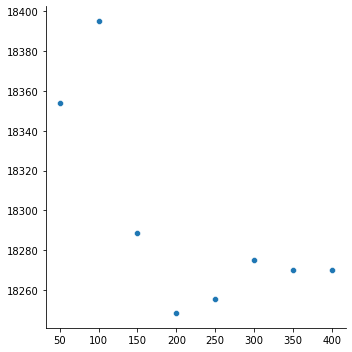

In [123]:
sns.relplot(list(results.keys()), list(results.values()))

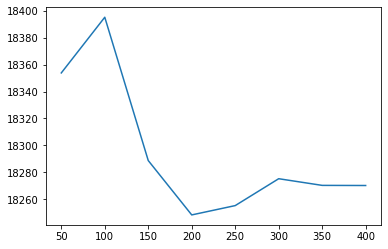

In [124]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [126]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

200

# XGBoost